# Brain Tumor Detection

In [1]:
import os
from operator import itemgetter    
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from __future__ import print_function
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from keras.datasets import cifar10
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import layers
from PIL import Image
import glob
import tensorflow as tf
import matplotlib.image as img
import os, os.path
from multiprocessing import Pool
%matplotlib inline

In [3]:
seed = 0
np.random.seed(seed)

In [4]:
# For google colab but not for actual computer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
images = []
filename = []
image_file = []
label_name = []
number_classes = 2
# This is the path if you are doing it in your computer but the data set was to bing and it would take to long to do so
# paths = "/home/ronaldson_bellande/Desktop/Healthcare Data Analytics/Disease Analysis/Brain_Tumor/Data/Data/"

# This is the google colab paths
paths = "/content/drive/My Drive/Colab Notebooks/Data/Data"
valid_images = [".jpg",".png"]
for img in os.listdir(paths):
    ext = os.path.splitext(img)[1]
    if ext.lower() not in valid_images:
        continue
    images.append(Image.open(os.path.join(paths,img)))

In [6]:
for i in range(len(images)):
    print(images[i])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=276x338 at 0x7F19F9451550>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=228x221 at 0x7F19F93B8A58>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=235x214 at 0x7F19F93B8EB8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=218x231 at 0x7F19F93C4320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=211x239 at 0x7F19F93C4390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=620x620 at 0x7F19F93C4400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x218 at 0x7F19F93C4470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x290 at 0x7F19F93C44E0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=205x243 at 0x7F19F93C46A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x340 at 0x7F19F93C4780>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=303x354 at 0x7F19F93C4860>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=225x225 at 0x7F19F93C4940>
<PIL.JpegImagePlug

In [7]:
for i in range(len(images)):
    print(i,": ",images[i].format)
    print(i,": ",images[i].mode)
    print(i,": ",images[i].size)

0 :  JPEG
0 :  RGB
0 :  (276, 338)
1 :  JPEG
1 :  RGB
1 :  (228, 221)
2 :  JPEG
2 :  RGB
2 :  (235, 214)
3 :  JPEG
3 :  RGB
3 :  (218, 231)
4 :  JPEG
4 :  RGB
4 :  (211, 239)
5 :  JPEG
5 :  RGB
5 :  (620, 620)
6 :  JPEG
6 :  RGB
6 :  (180, 218)
7 :  JPEG
7 :  RGB
7 :  (250, 290)
8 :  JPEG
8 :  RGB
8 :  (205, 243)
9 :  JPEG
9 :  RGB
9 :  (314, 340)
10 :  JPEG
10 :  RGB
10 :  (303, 354)
11 :  JPEG
11 :  L
11 :  (225, 225)
12 :  JPEG
12 :  RGB
12 :  (441, 442)
13 :  JPEG
13 :  RGB
13 :  (260, 331)
14 :  JPEG
14 :  L
14 :  (409, 442)
15 :  JPEG
15 :  RGB
15 :  (229, 270)
16 :  JPEG
16 :  RGB
16 :  (225, 225)
17 :  JPEG
17 :  RGB
17 :  (306, 365)
18 :  JPEG
18 :  RGB
18 :  (227, 222)
19 :  JPEG
19 :  RGB
19 :  (209, 212)
20 :  JPEG
20 :  RGB
20 :  (206, 244)
21 :  JPEG
21 :  RGB
21 :  (278, 324)
22 :  JPEG
22 :  RGB
22 :  (339, 340)
23 :  JPEG
23 :  RGB
23 :  (225, 225)
24 :  JPEG
24 :  L
24 :  (289, 300)
25 :  JPEG
25 :  RGB
25 :  (273, 342)
26 :  JPEG
26 :  RGB
26 :  (213, 236)
27 :  JPEG

In [8]:
# This is the path if you are doing it on your own computer
# path = "/home/ronaldson_bellande/Desktop/Healthcare Data Analytics/Disease Analysis/Brain_Tumor/Data/Data/1 no.jpeg"

# This is the path if your doing it on colab
path = "/content/drive/My Drive/Colab Notebooks/Data/Data/1 no.jpeg"

In [9]:
image  = cv2.imread(path, 0)

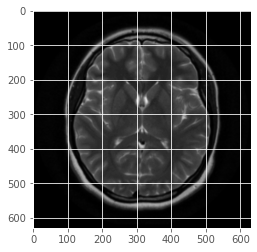

In [10]:
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [11]:
# Resize the image to have a dimention of 240 by 240
image = cv2.resize(image,(240,240))

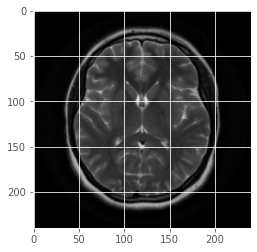

In [12]:
plt.imshow(image,cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [13]:
images = []
filename = []
image_file = []
label_name = []
paths = "/content/drive/My Drive/Colab Notebooks/Data/Data"

In [14]:
# Label and Standardizing
# Loading files from directory
for imagename in os.listdir(paths):
    filename.append(imagename)
    
    # Reading images using CV2
    image = cv2.imread(os.path.join(paths,imagename))
    image = cv2.resize(image,(240,240), interpolation = cv2.INTER_AREA)
    image_file.append(image)

    # Label images
    if 'y' in imagename.lower():
        label_name.append(1)
    elif 'n' in imagename.lower():
        label_name.append(0)
    else:
        print('error')

In [22]:
image_file = np.array(image_file)
print(image_file)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [23]:
label_name = np.array(label_name)
label_name.resize((len(image_file),1))
print(label_name)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]


In [24]:
#Splitting the Training Data and the Test Data
X_train, X_test, Y_train_vec, Y_test_vec = train_test_split(image_file, label_name, test_size = 0.20, random_state = 0)

In [25]:
input_shape = X_train.shape[1:]
print(input_shape)

(240, 240, 3)


In [26]:
print('x_train shape:', X_train.shape)
print('y_train shape:', Y_train_vec.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (202, 240, 240, 3)
y_train shape: (202, 1)
202 train samples
51 test samples


In [27]:
# Convert vectors to binary for Y_axis
Y_train = keras.utils.to_categorical(Y_train_vec,number_classes)
Y_test = keras.utils.to_categorical(Y_test_vec,number_classes)

In [28]:
# Turning it into float
print(X_train)
X_train = X_train.astype("float32")
X_train /= 255
print(X_train)
print(X_test)
X_test = X_test.astype("float32")
X_test /= 255
print(X_test)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 13  13  13]
   [ 16  16  16]
   [ 21  21  21]
   ...
   [ 77  77  77]
   [ 77  77  77]
   [ 73  73  73]]

  [[ 12  12  12]
   [ 16  16  16]
   [ 20  20  20]
   ...
   [ 62  62  62]
   [ 62  62  62]
   [ 64  64  64]]

  [[ 12  12  12]
   [ 15  15  15]
   [ 19  19  19]
   ...
   [ 17  17  17]
   [ 17  17  17]
   [ 17  17

In [29]:
# Create CNN
def ConvNeuralNetwork():
    model = Sequential()
    # First Hitten Layer with 64, 7, 7
    model.add(Conv2D(64,(7,7), strides = (1,1), padding="same", input_shape = input_shape, activation = "relu"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(0.25))
    
    # Second Hitten Layer 32, 7, 7
    model.add(Conv2D(32,(7,7), strides = (1,1), padding="same", activation = "relu"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    # # Second Hitten Layer 32, 7, 7
    # model.add(Conv2D(16,(7,7), strides = (1,1), padding="same", activation = "relu"))
    # model.add(MaxPooling2D(pool_size = (1,1)))
    # model.add(Dropout(0.25))
    
    # last layer, output Layer
    model.add(Flatten())
    model.add(Dense(units = number_classes, activation = 'softmax', input_dim=2))

    
    model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [30]:
model = KerasClassifier(build_fn = ConvNeuralNetwork, verbose = 0)

In [31]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = 1, cv = 3, verbose = 10)

In [32]:
# Reshaped X_axis for train and test to be [samples, time steps, features]
print("Before: ", X_train.shape)
print("Before: ",X_test.shape)
#X_train = X_train.reshape(-1,192,240,1).astype("float32")
#X_test = X_test.reshape(-1,48,240,1).astype("float32")
#X_train = X_train.shape[1:]
#print("After: ",X_train.shape)
#print("After: ",X_test.shape)
#print("Y_train: ",Y_train.shape)
#print("Y_test: ",Y_test.shape)

Before:  (202, 240, 240, 3)
Before:  (51, 240, 240, 3)


In [33]:
# Grid Results
# Use TPU or GPU from google colab to do all this 
# tf.keras.backend.clear_session()

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

with tf.device('/device:GPU:0'):
  grid_results = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.853, total=  11.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.806, total=   3.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.806, total=   3.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.779, total=  16.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.836, total=  16.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.701, total=  16.7s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.779, total=  32.8s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.851, total=  32.9s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.731, total=  33.6s
[CV] batch_size=20, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min remaining:    0.0s


[CV] ............ batch_size=20, epochs=10, score=0.809, total=   4.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.821, total=   4.0s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.791, total=   3.8s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.735, total=  16.5s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.866, total=  16.6s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.731, total=  16.5s
[CV] batch_size=20, epochs=100 .......................................
[CV] ........... batch_size=20, epochs=100, score=0.750, total=  32.4s
[CV] batch_size=20, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 16.4min finished


In [34]:
model = ConvNeuralNetwork()
print(model.summary())

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 240, 240, 64)      9472      
_________________________________________________________________
activation_110 (Activation)  (None, 240, 240, 64)      0         
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_110 (Dropout)        (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 60, 60, 32)        100384    
_________________________________________________________________
activation_111 (Activation)  (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 30, 30, 32)      

In [35]:
early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1)

batch_size = 40 
epochs = 100

brain_cancer_model = model.fit(X_train, Y_train,
          batch_size=batch_size,
          validation_split=0.15,
          epochs=epochs,
          callbacks=[early],
          shuffle=True)

Epoch 1/100
5/5 [==============================] - 2s 248ms/step - loss: 0.6509 - accuracy: 0.6337 - val_loss: 0.6580 - val_accuracy: 0.9032
Epoch 2/100
5/5 [==============================] - 0s 94ms/step - loss: 0.6274 - accuracy: 0.7259 - val_loss: 0.4452 - val_accuracy: 0.8710
Epoch 3/100
5/5 [==============================] - 1s 148ms/step - loss: 0.5419 - accuracy: 0.7572 - val_loss: 0.4802 - val_accuracy: 0.8387
Epoch 4/100
5/5 [==============================] - 0s 95ms/step - loss: 0.5107 - accuracy: 0.7326 - val_loss: 0.3735 - val_accuracy: 0.9032
Epoch 5/100
5/5 [==============================] - 0s 96ms/step - loss: 0.4897 - accuracy: 0.7552 - val_loss: 0.3837 - val_accuracy: 0.8710
Epoch 6/100
5/5 [==============================] - 0s 95ms/step - loss: 0.4560 - accuracy: 0.7900 - val_loss: 0.3414 - val_accuracy: 0.9032
Epoch 7/100
5/5 [==============================] - 0s 94ms/step - loss: 0.4279 - accuracy: 0.8269 - val_loss: 0.3143 - val_accuracy: 0.9032
Epoch 8/100
5/5 [=

In [36]:
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print("Loss:", evaluation[0])
print("Accuracy: ", evaluation[1])

2/2 [==============================] - 0s 115ms/step - loss: 1.5103 - accuracy: 0.8039
Loss: 1.5103418827056885
Accuracy:  0.8039215803146362


In [37]:
def plot_model(brain_cancer_model):
  plt.plot(brain_cancer_model.history['accuracy'])
  plt.plot(brain_cancer_model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(brain_cancer_model.history['loss'])
  plt.plot(brain_cancer_model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

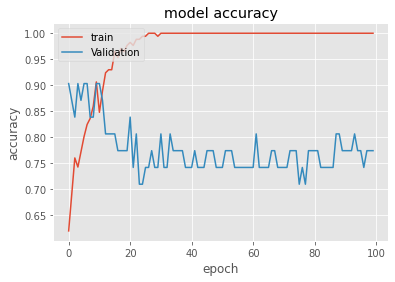

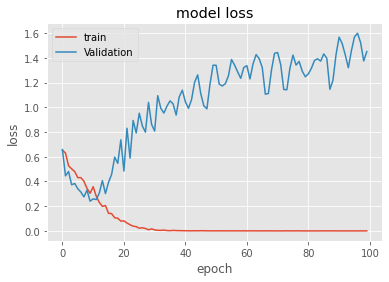

In [38]:
plot_model(brain_cancer_model)

In [39]:
model_labels = ['No Brain Tumor', 'Brain Tumor']

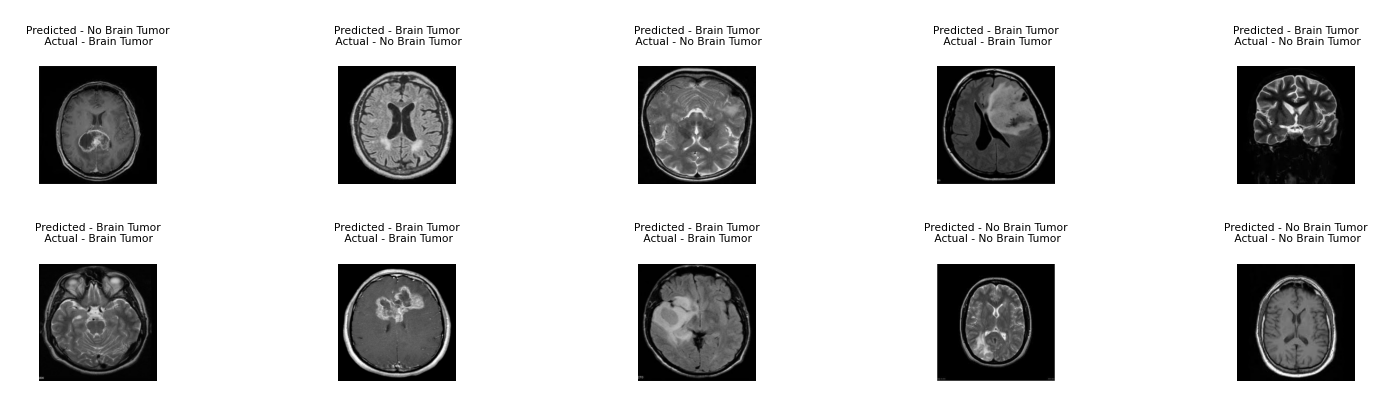

In [40]:
def plot_random_examples():

    plt.figure( dpi=256)
    predicted_classes = model.predict_classes(X_test)

    for i in range(10):
        plt.subplot(5,5,i+1)
        fig=plt.imshow(X_test[i,:,:,:])
        plt.axis('off')
        plt.title("Predicted - {}".format(model_labels[predicted_classes[i]] ) + "\n Actual - {}".format(model_labels[Y_test_vec[i,0]] ),fontsize=3)
        plt.tight_layout()
    
plot_random_examples()

In [41]:
brain_cancer_model = Sequential()

In [42]:
def MyConv(model, first = False):
    if first == False:
        model.add(Conv2D(64, (4, 4),strides = (1,1), padding='same'))
    else:
        model.add(Conv2D(64, (4, 4),strides = (1,1), padding='same',
                 input_shape = input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))


    model.add(Conv2D(32, (4, 4),strides = (1,1),padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    return None

In [45]:
def ConvNeuralNetwork():
    model1 = Sequential()
    MyConv(model1, first = True)
    MyConv(model1)
    MyConv(model1)
    MyConv(model1)

    model1.add(Flatten())
    model1.add(Dense(2))
    model1.add(Activation('softmax'))

    model1.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])
    return model1

In [46]:
model = ConvNeuralNetwork()
print(model.summary())
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 240, 240, 64)      3136      
_________________________________________________________________
activation_120 (Activation)  (None, 240, 240, 64)      0         
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 120, 120, 64)      0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 120, 120, 32)      32800     
_________________________________________________________________
activation_121 (Activation)  (None, 120, 120, 32)      0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 120, 120, 32)    

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=0, verbose=1 )

In [48]:
brain_cancer_model=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.15,
          callbacks=[stop_early],
          shuffle=True) 

Epoch 1/100
5/5 [==============================] - 3s 330ms/step - loss: 0.6857 - accuracy: 0.4528 - val_loss: 0.6895 - val_accuracy: 0.6452
Epoch 2/100
5/5 [==============================] - 1s 151ms/step - loss: 0.6503 - accuracy: 0.6373 - val_loss: 0.6878 - val_accuracy: 0.6452
Epoch 3/100
5/5 [==============================] - 1s 152ms/step - loss: 0.6280 - accuracy: 0.6377 - val_loss: 0.6914 - val_accuracy: 0.6452
Epoch 4/100
5/5 [==============================] - 1s 151ms/step - loss: 0.6345 - accuracy: 0.6196 - val_loss: 0.6770 - val_accuracy: 0.6452
Epoch 5/100
5/5 [==============================] - 1s 152ms/step - loss: 0.6405 - accuracy: 0.6171 - val_loss: 0.6896 - val_accuracy: 0.6129
Epoch 6/100
5/5 [==============================] - 1s 151ms/step - loss: 0.6192 - accuracy: 0.6717 - val_loss: 0.6296 - val_accuracy: 0.8065
Epoch 7/100
5/5 [==============================] - 1s 154ms/step - loss: 0.6547 - accuracy: 0.7237 - val_loss: 0.6954 - val_accuracy: 0.4194
Epoch 8/100
5

In [49]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss: %.2f' %scores[0])
print('Test accuracy: %0.2f' %scores[1])

2/2 [==============================] - 0s 194ms/step - loss: 0.8544 - accuracy: 0.7255
Test loss: 0.85
Test accuracy: 0.73


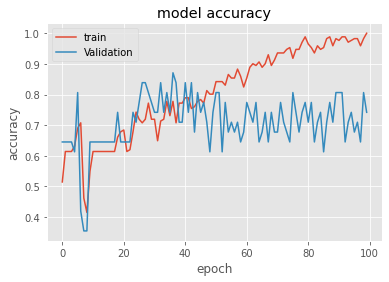

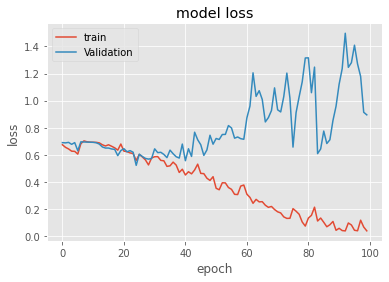

In [50]:
def plot_train_and_val(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

plot_train_and_val(brain_cancer_model)

In [51]:
model_labels = ['No Brain Tumor', 'Brain Tumor']

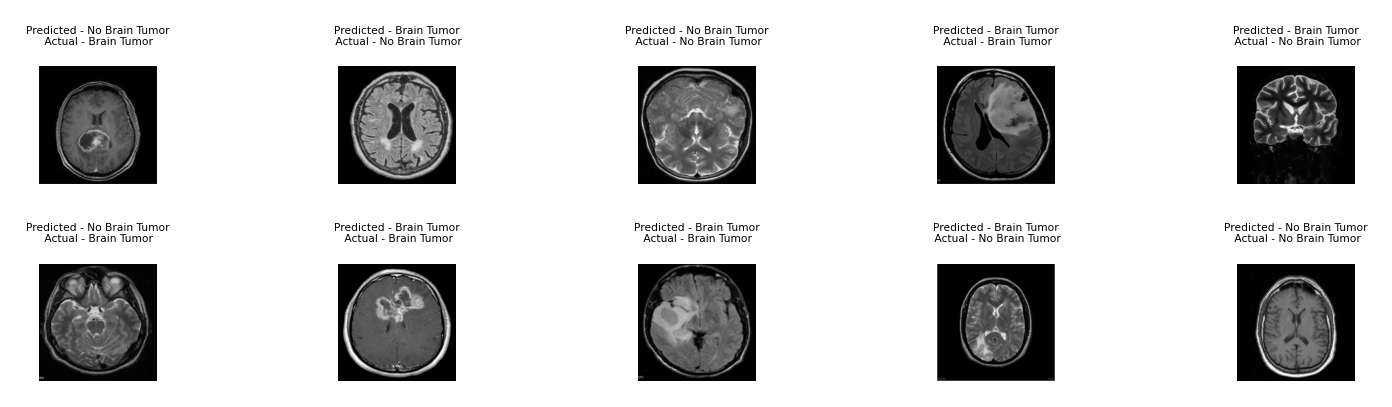

In [52]:
def plot_random_examples():

    plt.figure( dpi=256)
    predicted_classes = model.predict_classes(X_test)

    for i in range(10):
        plt.subplot(5,5,i+1)
        fig=plt.imshow(X_test[i,:,:,:])
        plt.axis('off')
        plt.title("Predicted - {}".format(model_labels[predicted_classes[i]] ) + "\n Actual - {}".format(model_labels[Y_test_vec[i,0]] ),fontsize=3)
        plt.tight_layout()
    
plot_random_examples()

In [16]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import torch.nn as nn
# import numpy as np
# import os, json
# import torch
# from torchvision import models, transforms
# from torch.autograd import Variable
# import torch.nn.functional as F

import tensorflow as tf
# from tf_slim
# slim = tf_slim
# #tf.contrib.slim
import sys
sys.path.append('/Users/marcotcr/phd/tf-models/slim')
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# !pip3 uninstall nets
!pip3 install preprocessing
!python setup install
from preprocessing import inception_preprocessing

     |████████████████████████████████| 358kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 14.9MB/s 
     |████████████████████████████████| 1.4MB 36.2MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-cp36-none-any.whl size=1367704 sha256=91b5a994adec53c248b3e8a00c137460bda56319c6d57121a7e4bcf9f54084b5
  Stored in directory: /root/.cache/pip/wheels/36/f1/5c/f667347d86a3a534ba4c0127eed4389f929916e3ec88bb461a
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
python3: can't open file 'setup': [Errno 2] No such file or directory


ImportError: ignored

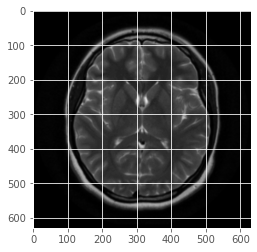

In [13]:
y
yimage  = cv2.imread(path, 0)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [14]:
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])       
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])    

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    return transf(img).unsqueeze(0)

In [15]:
model = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [16]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf  

In [63]:
idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('./data/imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}

FileNotFoundError: ignored